# <font color='blue'>Problema de Estatística: Relação entre tipo de promoção e preferência do cliente por determinado produto</font>

# 1 - Definindo o problema de negócio

### Uma rede de supermercados deseja verificar se há uma relação entre o tipo de promoção oferecida e a preferência do cliente por um determinado produto. Eles acreditam que o tipo de promoção (desconto percentual, compre 1 leve 2, ou preço fixo) pode influenciar a escolha do cliente.


# 2 - Decisões

### O problema de negócio é estatístico. Tratando-se de variáveis categóricas, podemos aplicar um teste qui quadrado para resolver este problema. 

# 3 - Versão python e import dos pacotes utilizados

In [13]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.4


In [14]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [15]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Danilo Temerloglou de Abreu" --iversions

Author: Danilo Temerloglou de Abreu

scipy     : 1.13.1
seaborn   : 0.13.2
pandas    : 2.2.2
numpy     : 1.26.4
matplotlib: 3.8.4



# 4 - Criando os Conjuntos de dados

In [17]:
# Definindo os tipos de promoções e a resposta dos clientes
np.random.seed(42)
tipos_promocao = ['Desconto Percentual', 'Compre 1 Leve 2', 'Preço Fixo']
preferencia = ['Preferiu', 'Não Preferiu']

# Criando um DataFrame com 300 observações
data = {
    'Promocao': np.random.choice(tipos_promocao, 3000),
    'Preferencia': np.random.choice(preferencia, 3000)
}

df = pd.DataFrame(data)

# Exibindo os primeiros registros do DataFrame
df.head()

,Promocao,Preferencia
0,Preço Fixo,Não Preferiu
1,Desconto Percentual,Não Preferiu
2,Preço Fixo,Não Preferiu
3,Preço Fixo,Preferiu
4,Desconto Percentual,Preferiu


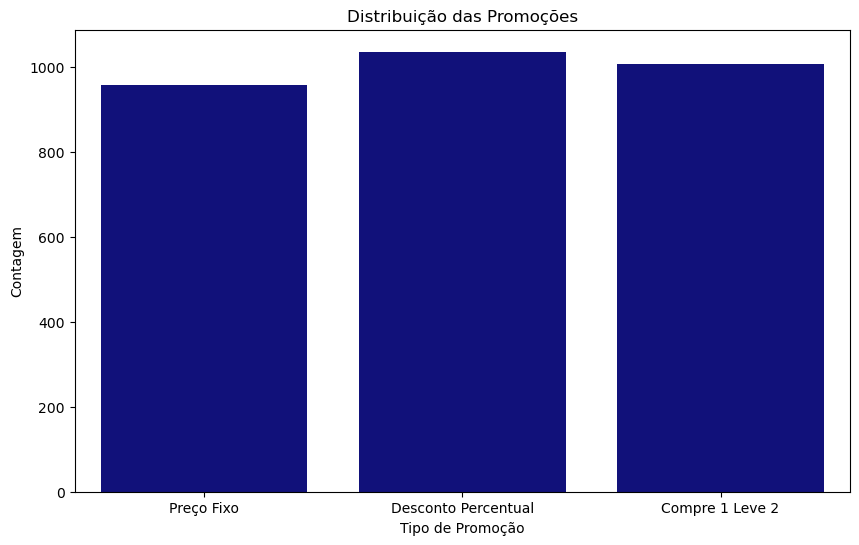

In [18]:
# Criando o gráfico de contagem para a distribuição das promoções
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Promocao', color='darkblue')
plt.title('Distribuição das Promoções')
plt.xlabel('Tipo de Promoção')
plt.ylabel('Contagem')
plt.show()

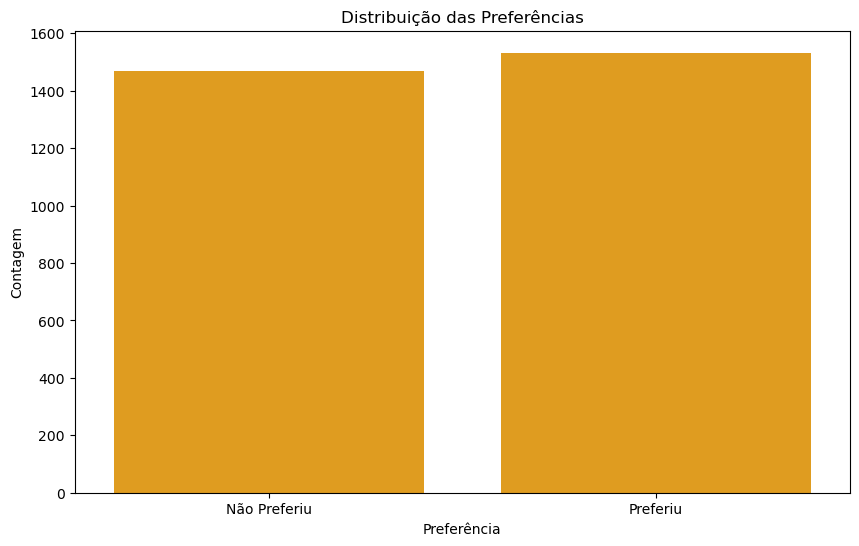

In [19]:
# Criando o gráfico de contagem para a distribuição das preferências
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Preferencia', color='orange')
plt.title('Distribuição das Preferências')
plt.xlabel('Preferência')
plt.ylabel('Contagem')
plt.show()

# 5 - Verificando as suposições, para saber se podemos aplicar o teste qui quadrado

## 5.1 Observações devem ser independentes

### Garantimos isso na criação dos dados aleatórios.

## 5.2 Tamanho da amostra suficiente - mínimo 30

### Garantimos isso na criação dos dados aleatórios.

# 6 - Teste de hipóteses

## 6.1 Análise dos resultados

In [20]:
from scipy.stats import chi2_contingency

# Criando a tabela de contingência
contingencia = pd.crosstab(df['Promocao'], df['Preferencia'])

# Calculando o teste do qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

print(f"Estatística Qui-Quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de Liberdade: {dof}")
print(f"Frequências Esperadas: \n{expected}")

Estatística Qui-Quadrado: 1.0873563898085603
p-valor: 0.5806087279277433
Graus de Liberdade: 2
Frequências Esperadas: 
[[492.75866667 514.24133333]
 [506.94933333 529.05066667]
 [468.292      488.708     ]]


## 6.2 Interpretação dos resultados

In [21]:
if p < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre o tipo de promoção e a preferência do cliente.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que existe uma relação entre o tipo de promoção e a preferência do cliente.")

Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que existe uma relação entre o tipo de promoção e a preferência do cliente.


### Conclusão: 
### Não rejeitamos a hipótese nula. 
### Não há evidências suficientes para afirmar que existe uma relação entre o tipo de promoção e a preferência do cliente.

# Fim